<a href="https://colab.research.google.com/github/mamathaguntu/CMPE255/blob/master/Catchup1_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


cars_data = pd.read_csv('/content/sample_data/cars.csv')
cars_data

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
2,2013,FORD,FOCUS ELECTRIC,COMPACT,107,A1,B,19.0,21.1,20.0,2.1,2.4,2.2,0,NaN,122,4
3,2013,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
4,2013,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7
5,2013,SMART,FORTWO ELECTRIC DRIVE CABRIOLET,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
6,2013,SMART,FORTWO ELECTRIC DRIVE COUPE,TWO-SEATER,35,A1,B,17.2,22.5,19.6,1.9,2.5,2.2,0,NaN,109,8
7,2013,TESLA,MODEL S (40 kWh battery),FULL-SIZE,270,A1,B,22.4,21.9,22.2,2.5,2.5,2.5,0,NaN,224,6
8,2013,TESLA,MODEL S (60 kWh battery),FULL-SIZE,270,A1,B,22.2,21.7,21.9,2.5,2.4,2.5,0,NaN,335,10
9,2013,TESLA,MODEL S (85 kWh battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,NaN,426,12


## APRIORI

In [ ]:
min_support = 2
data = []
for i in range(0, 20):
    data.append([str(cars_data.values[i,j]) for j in range(0, 4)])

In [ ]:
# remove nan records 

items = sorted([item for sl in data for item in sl if item != 'nan'])

In [ ]:
def iter1(items, min_support):
    confidence1 = {i:items.count(i) for i in items}
    list1 = {}
    for key, value in confidence1.items():
        if value >= min_support:
           list1[key] = value 
    
    return confidence1, list1
confidence1, list1 = iter1(items, min_support)

In [ ]:
def check_freq(itemset, l, n):
    if n>1:    
        subsets = list(itertools.combinations(itemset, n))
    else:
        subsets = itemset
    for iter1 in subsets:
        if not iter1 in l:
            return False
    return True

In [ ]:
import itertools

def iter2(list1, records, min_support):
    list1 = sorted(list(list1.keys()))
    temp_list = list(itertools.combinations(list1, 2))
    conf2 = {}
    list2 = {}
    for iter1 in temp_list:
        count = 0
        for iter2 in data:
            if iter2 not in iter1:
                count+=1
        conf2[iter1] = count
    for key, value in conf2.items():
        if value >= min_support:
            if check_freq(key, list1, 1):
                list2[key] = value 
    
    return conf2, list2
conf2, list2 = iter2(list1, data, min_support)

In [ ]:
def iter3(list2, data, min_support):
    list2 = list(list2.keys())
    temp_list2 = sorted(list(set([item for t in list2 for item in t])))
    temp_list2 = list(itertools.combinations(temp_list2, 3))
    conf3 = {}
    list3 = {}
    for i1 in temp_list2:
        count = 0
        for i2 in data:
            if i1 not in i2:
                count+=1
        conf3[i1] = count
    for key, value in conf3.items():
        if value >= min_support:
            if check_freq(key, list2, 2):
                list3[key] = value 
        
    return conf3, list3
conf3, list3 = iter3(list2, data, min_support)

In [ ]:
def iter4(list3, records, min_support):
    list3 = list(list3.keys())
    temp_list3 = sorted(list(set([item for t in list3 for item in t])))
    temp_list3 = list(itertools.combinations(temp_list3, 4))
    conf4 = {}
    list4 = {}
    for i1 in temp_list3:
        count = 0
        for i2 in records:
            if i1 not in i2:
                count+=1
        conf4[i1] = count
    for key, value in conf4.items():
        if value >= min_support:
            if check_freq(key, list3, 3):
                list4[key] = value 
        
    return conf4, list4
conf4, list4 = iter4(list3, data, min_support)

In [ ]:
itemlist = {**list1, **list2, **list3, **list4}

In [ ]:
i_sets  = []
for i1 in list(list3.keys()):
    temp_sets = list(itertools.combinations(i1, 2))
    i_sets.append(temp_sets)

In [ ]:
def get_support_count(itemset, itemlist):
    return itemlist[itemset]
list_l3 = list(list3.keys())
for i in range(0, len(list_l3)):
  for i1 in i_sets[i]:
      a = i1
      b = set(list_l3[i]) - set(i1)
      confidence = (get_support_count(list_l3[i], itemlist)/get_support_count(i1, itemlist))*100
      print("Confidence{}->{} = ".format(a,b), confidence)

Confidence('2012', '2013')->{'2014'} =  100.0
Confidence('2012', '2014')->{'2013'} =  100.0
Confidence('2013', '2014')->{'2012'} =  100.0
Confidence('2012', '2013')->{'COMPACT'} =  100.0
Confidence('2012', 'COMPACT')->{'2013'} =  100.0
Confidence('2013', 'COMPACT')->{'2012'} =  100.0
Confidence('2012', '2013')->{'FOCUS ELECTRIC'} =  100.0
Confidence('2012', 'FOCUS ELECTRIC')->{'2013'} =  100.0
Confidence('2013', 'FOCUS ELECTRIC')->{'2012'} =  100.0
Confidence('2012', '2013')->{'FORD'} =  100.0
Confidence('2012', 'FORD')->{'2013'} =  100.0
Confidence('2013', 'FORD')->{'2012'} =  100.0
Confidence('2012', '2013')->{'FORTWO ELECTRIC DRIVE CABRIOLET'} =  100.0
Confidence('2012', 'FORTWO ELECTRIC DRIVE CABRIOLET')->{'2013'} =  100.0
Confidence('2013', 'FORTWO ELECTRIC DRIVE CABRIOLET')->{'2012'} =  100.0
Confidence('2012', '2013')->{'FORTWO ELECTRIC DRIVE COUPE'} =  100.0
Confidence('2012', 'FORTWO ELECTRIC DRIVE COUPE')->{'2013'} =  100.0
Confidence('2013', 'FORTWO ELECTRIC DRIVE COUPE')->{

## Gradient Boost

In [ ]:
import typing
import numpy as np

def GradBoost(model,
              X_test: np.array,                 
              X_train: np.array,                
              y_train: np.array,               
              boosting_rounds: int = 100,        
              learning_rate: float = 0.1,       
              verbose: bool = True) -> np.array: 
      
   
    y_hat_train = np.repeat(np.mean(y_train), len(y_train))

    y_hat_train_test = np.repeat(np.mean(y_train), len(X_test))
  
    pseudo_resids = y_train - y_hat_train
    
    # performs gradient boosting with a tqdm progress bar
    if verbose:
        from tqdm import tqdm
      
        for _ in tqdm(range(0, boosting_rounds)):
       
            model = model.fit(X_train, pseudo_resids)   
          
            y_hat_train += learning_rate * model.predict(X_train)       
          
            y_hat_train_test += learning_rate * model.predict(X_test)
          
            pseudo_resids = y_train - y_hat_train 
    
    else:
        # iterates through the boosting round
        for _ in range(0, boosting_rounds):
           
            model = model.fit(X_train, pseudo_resids)   
           
            y_hat_train += learning_rate * model.predict(X_train)       
           
            y_hat_train_test += learning_rate * model.predict(X_test)
           
            pseudo_resids = y_train - y_hat_train  


    return y_hat_train, y_hat_train_test

In [ ]:
from sklearn.datasets import make_regression

X, y = make_regression(n_samples=1000, 
                       n_features=20, 
                       n_informative=15, 
                       n_targets=1, 
                       bias=0.0, 
                       noise=20,
                       shuffle=True,
                       random_state=13)

X_train = X[0:int(len(X) / 2)]
y_train = y[0:int(len(X) / 2)]

X_test = X[int(len(X) / 2):]
y_test = y[int(len(X) / 2):]

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import RidgeCV

tree_model = DecisionTreeRegressor(criterion='mse',
                                   max_depth=3)
ridge_model = RidgeCV(alphas=(0.01, 0.1, 1.0, 10.0), 
                      fit_intercept=True, 
                      normalize=True,
                      cv=3)

from tqdm import tqdm_notebook as tqdm
tree_mse_train = []
n_rounds = np.arange(5, 101, 5)
for n_round in tqdm(n_rounds):
    y_hat_train = GradBoost(tree_model,
                            X_test,
                            X_train,   
                            y_train,  
                            boosting_rounds=n_round,  
                            learning_rate=0.1,
                            verbose=False)[0]
    
    tree_mse_train.append(np.mean((y_train - y_hat_train) ** 2))


ridge_mse_train = []
for n_round in tqdm(n_rounds):
    y_hat_train = GradBoost(ridge_model,
                            X_test,
                            X_train,   
                            y_train,  
                            boosting_rounds=n_round,  
                            learning_rate=0.1,
                            verbose=False)[0]
    
    ridge_mse_train.append(np.mean((y_train - y_hat_train) ** 2))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


  0%|          | 0/20 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py:363: FutureWarning: 

  0%|          | 0/20 [00:00<?, ?it/s]

Streaming output truncated to the last 5000 lines.
Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), Ridge())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * n_samples. 
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the d

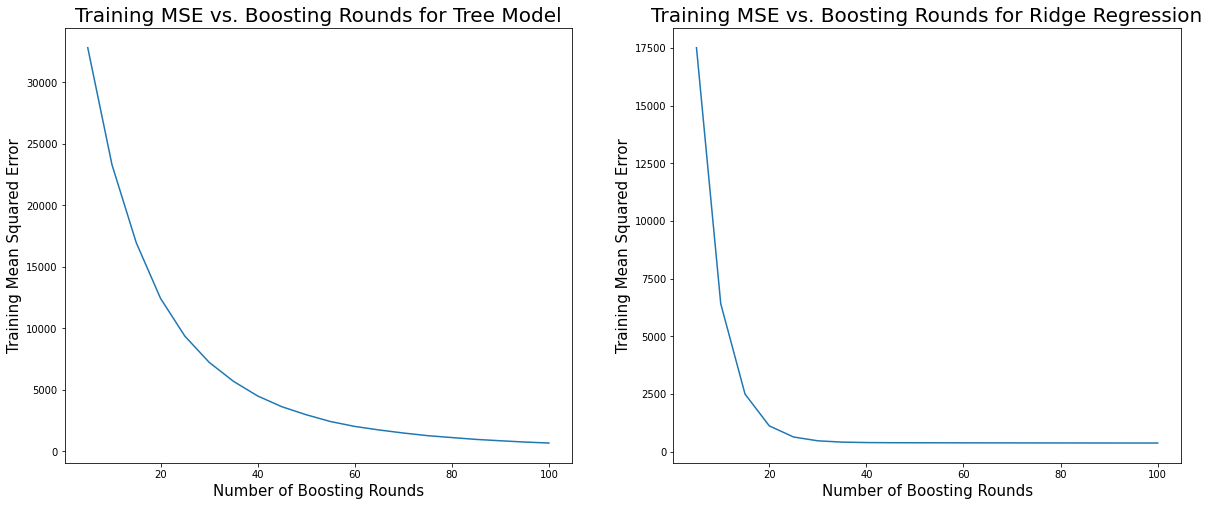

In [ ]:

plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1, 2, 1)
plt.plot(n_rounds, tree_mse_train)
plt.title('Training MSE vs. Boosting Rounds for Tree Model', fontsize=20)
plt.xlabel('Number of Boosting Rounds', fontsize=15)
plt.ylabel('Training Mean Squared Error', fontsize=15)
plt.show;


plt.rcParams['figure.figsize'] = (20,8)

plt.subplot(1, 2, 2)
plt.plot(n_rounds, ridge_mse_train)
plt.title('Training MSE vs. Boosting Rounds for Ridge Regression', fontsize=20)
plt.xlabel('Number of Boosting Rounds', fontsize=15)
plt.ylabel('Training Mean Squared Error', fontsize=15)
plt.show;

## FPGROWTH

In [ ]:
import time

#Function to load file and return lists of Transactions
def Load_data(filename):
    with open(filename) as f:
        content = f.readlines()

    content = [x.strip() for x in content]
    Transaction = []

    for i in range(0, len(content)):
        Transaction.append(content[i].split())

    return Transaction

#To convert initial transaction into frozenset
def create_initialset(dataset):
    retDict = {}
    for trans in dataset:
        retDict[frozenset(trans)] = 1
    return retDict

#class of FP TREE node
class TreeNode:
    def __init__(self, Node_name,counter,parentNode):
        self.name = Node_name
        self.count = counter
        self.nodeLink = None
        self.parent = parentNode
        self.children = {}
        
    def increment_counter(self, counter):
        self.count += counter

#To create Headertable and ordered itemsets for FP Tree
def create_FPTree(dataset, minSupport):
    HeaderTable = {}
    for transaction in dataset:
        for item in transaction:
            HeaderTable[item] = HeaderTable.get(item,0) + dataset[transaction]
    for k in list(HeaderTable):
        if HeaderTable[k] < minSupport:
            del(HeaderTable[k])

    frequent_itemset = set(HeaderTable.keys())

    if len(frequent_itemset) == 0:
        return None, None

    for k in HeaderTable:
        HeaderTable[k] = [HeaderTable[k], None]

    retTree = TreeNode('Null Set',1,None)
    for itemset,count in dataset.items():
        frequent_transaction = {}
        for item in itemset:
            if item in frequent_itemset:
                frequent_transaction[item] = HeaderTable[item][0]
        if len(frequent_transaction) > 0:
            #to get ordered itemsets form transactions
            ordered_itemset = [v[0] for v in sorted(frequent_transaction.items(), key=lambda p: p[1], reverse=True)]
            #to update the FPTree
            updateTree(ordered_itemset, retTree, HeaderTable, count)
    return retTree, HeaderTable

#To create the FP Tree using ordered itemsets
def updateTree(itemset, FPTree, HeaderTable, count):
    if itemset[0] in FPTree.children:
        FPTree.children[itemset[0]].increment_counter(count)
    else:
        FPTree.children[itemset[0]] = TreeNode(itemset[0], count, FPTree)

        if HeaderTable[itemset[0]][1] == None:
            HeaderTable[itemset[0]][1] = FPTree.children[itemset[0]]
        else:
            update_NodeLink(HeaderTable[itemset[0]][1], FPTree.children[itemset[0]])

    if len(itemset) > 1:
        updateTree(itemset[1::], FPTree.children[itemset[0]], HeaderTable, count)

#To update the link of node in FP Tree
def update_NodeLink(Test_Node, Target_Node):
    while (Test_Node.nodeLink != None):
        Test_Node = Test_Node.nodeLink

    Test_Node.nodeLink = Target_Node

#To transverse FPTree in upward direction
def FPTree_uptransveral(leaf_Node, prefixPath):
 if leaf_Node.parent != None:
    prefixPath.append(leaf_Node.name)
    FPTree_uptransveral(leaf_Node.parent, prefixPath)

#To find conditional Pattern Bases
def find_prefix_path(basePat, TreeNode):
 Conditional_patterns_base = {}

 while TreeNode != None:
    prefixPath = []
    FPTree_uptransveral(TreeNode, prefixPath)
    if len(prefixPath) > 1:
        Conditional_patterns_base[frozenset(prefixPath[1:])] = TreeNode.count
    TreeNode = TreeNode.nodeLink

 return Conditional_patterns_base

#function to mine recursively conditional patterns base and conditional FP tree
def Mine_Tree(FPTree, HeaderTable, minSupport, prefix, frequent_itemset):
    bigL = [v[0] for v in sorted(HeaderTable.items(),key=lambda p: p[1][0])]
    for basePat in bigL:
        new_frequentset = prefix.copy()
        new_frequentset.add(basePat)
        #add frequent itemset to final list of frequent itemsets
        frequent_itemset.append(new_frequentset)
        #get all conditional pattern bases for item or itemsets
        Conditional_pattern_bases = find_prefix_path(basePat, HeaderTable[basePat][1])
        #call FP Tree construction to make conditional FP Tree
        Conditional_FPTree, Conditional_header = create_FPTree(Conditional_pattern_bases,minSupport)

        if Conditional_header != None:
            Mine_Tree(Conditional_FPTree, Conditional_header, minSupport, new_frequentset, frequent_itemset)

#to take input of filename and minimum support
print("Enter the filename:")
filename = input()
print("Enter the minimum support count:")
min_Support = int(input())

initSet = create_initialset(Load_data(filename))
start = time.time()
FPtree, HeaderTable = create_FPTree(initSet, min_Support)

frequent_itemset = []
#call function to mine all ferquent itemsets
Mine_Tree(FPtree, HeaderTable, min_Support, set([]), frequent_itemset)
end = time.time()

print("Time Taken is:")
print(end-start)
print("All frequent itemsets:")
print(frequent_itemset)

Enter the filename:
/content/sample_data/cars.csv
Enter the minimum support count:
2
Time Taken is:
0.0014159679412841797
All frequent itemsets:
[{'2013,SMART,FORTWO'}, {'DRIVE', '2013,SMART,FORTWO'}, {'ELECTRIC', '2013,SMART,FORTWO'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12', 'S'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12', 'kWh'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12', 'S', 'kWh'}, {'(85'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12', '(85'}, {'(85', 'S'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12', '(85', 'S'}, {'(85', 'kWh'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12', '(85', 'kWh'}, {'S', '(85', 'kWh'}, {'battery),FULL-SIZE,270,A1,B,23.8,23.2,23.6,2.7,2.6,2.6,0,n/a,426,12', 'S', '(85', 'kWh'}, {'PERFORMANCE,FULL-SIZE,310,A1,B,23.9,23.2,2

## K- Means

In [ ]:
cars_data.head(2)

,YEAR,Make,Model,Size,(kW),Unnamed: 5,TYPE,CITY (kWh/100 km),HWY (kWh/100 km),COMB (kWh/100 km),CITY (Le/100 km),HWY (Le/100 km),COMB (Le/100 km),(g/km),RATING,(km),TIME (h)
0,2012,MITSUBISHI,i-MiEV,SUBCOMPACT,49,A1,B,16.9,21.4,18.7,1.9,2.4,2.1,0,NaN,100,7
1,2012,NISSAN,LEAF,MID-SIZE,80,A1,B,19.3,23.0,21.1,2.2,2.6,2.4,0,NaN,117,7


In [ ]:
cars_data.Make.unique()

cars_data['Make'] = cars_data['Make'].map({'MITSUBISHI' : 0, 'NISSAN' : 1, 'FORD' : 2, 'SMART'  :3, 'TESLA' :4,
       'CHEVROLET':5, 'BMW' : 6, 'KIA' : 7})

In [ ]:
cars_data['Size'] = cars_data['Size'].map({'SUBCOMPACT' : 0, 'MID-SIZE' : 1, 'COMPACT' : 2, 'TWO-SEATER'  :3, 'FULL-SIZE' :4,
       'STATION WAGON - SMALL':5, 'SUV - STANDARD' : 6})

In [ ]:
cars_data['YEAR'] = pd.to_numeric(cars_data['YEAR'])

In [ ]:
cluster_df = cars_data[['Make', 'Size']].copy()

In [ ]:
cluster_df.dropna(axis=0, inplace=True)
cluster_df.sort_values(by=['Make', 'Size'],  inplace=True)

In [ ]:
cluster_arr = np.array(cluster_df)
cluster_arr[0:10]

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1],
       [1, 1]])

In [ ]:
def euclidean_distance(X1, X2):
    return (sum((X1 - X2)**2))**0.5

In [ ]:
def set_cluster(centroids, cluster_arr):
    clusters = []
    for i in range(cluster_arr.shape[0]):
        distances = []
        for centroid in centroids:
            distances.append(euclidean_distance(centroid, cluster_arr[i]))
        cluster = [z for z, val in enumerate(distances) if val==min(distances)]
        clusters.append(cluster [0])
    return clusters

In [ ]:
def get_centroid(clusters, cluster_arr):
    new_cent = []
    cluster_data = pd.concat([pd.DataFrame(cluster_arr), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_data['cluster']):
        current_cluster = cluster_data[cluster_data['cluster'] ==c][cluster_data.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        new_cent.append(cluster_mean)
    return new_cent

In [ ]:
def calc_variance(clusters, cluster_arr):
    sum_squares = []
    cluster_data = pd.concat([pd.DataFrame(cluster_arr), pd.DataFrame(clusters, columns=['cluster'])], axis=1)
    for c in set(cluster_data['cluster']):
        current_cluster = cluster_data[cluster_data['cluster']==c][cluster_data.columns[:-1]]
        cluster_mean = current_cluster.mean(axis=0)
        mean_repmat = np.matlib.repmat(cluster_mean, current_cluster.shape[0],1)
        sum_squares.append(np.sum(np.sum((current_cluster - mean_repmat)**2)))
    return sum_squares

In [ ]:
import numpy.matlib
import matplotlib.pyplot as plt
import seaborn as sns

k = 3
cluster_vars = []

centroids = [cluster_arr[i+2] for i in range(k)]
clusters = set_cluster(centroids, cluster_arr)
initial_clusters = clusters
print(0, round(np.mean(calc_variance(clusters, cluster_arr))))

for i in range(20):
    centroids = get_centroid(clusters, cluster_arr)
    clusters = set_cluster(centroids, cluster_arr)
    cluster_var = np.mean(calc_variance(clusters, cluster_arr))
    cluster_vars.append(cluster_var)
    print(i+1, round(cluster_var))

0 316
1 316
2 316
3 316
4 316
5 316
6 316
7 316
8 316
9 316
10 316
11 316
12 316
13 316
14 316
15 316
16 316
17 316
18 316
19 316
20 316


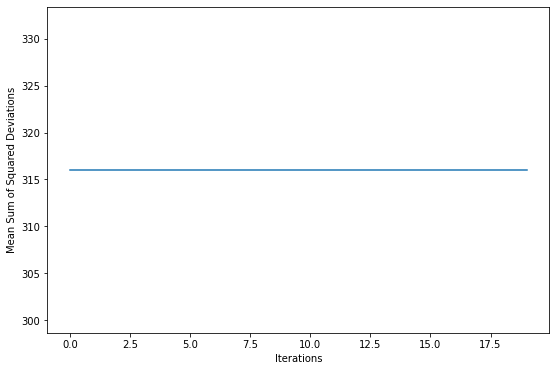

In [ ]:
plt.subplots(figsize=(9,6))
plt.plot(cluster_vars)
plt.xlabel('Iterations')
plt.ylabel('Mean Sum of Squared Deviations');

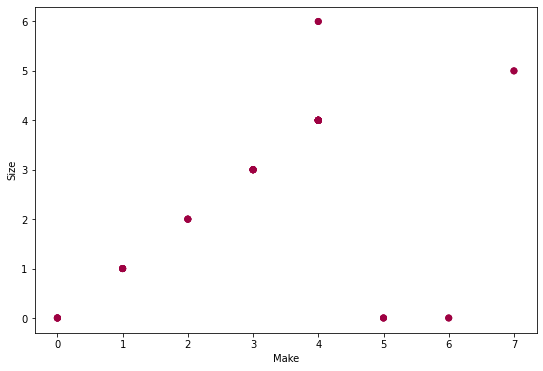

In [ ]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_arr[:,0], y=cluster_arr[:,1], c=initial_clusters, cmap=plt.cm.Spectral);
plt.xlabel('Make')
plt.ylabel('Size');

Text(0, 0.5, 'Size')

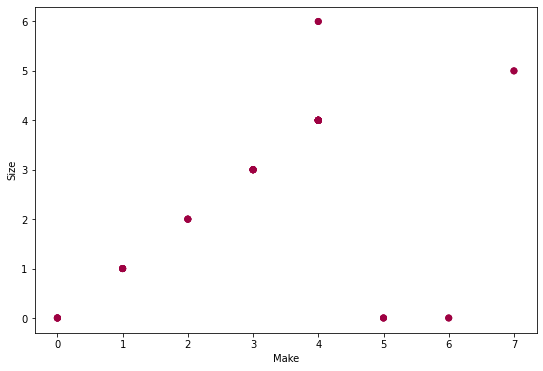

In [ ]:
plt.subplots(figsize=(9,6))
plt.scatter(x=cluster_arr[:,0], y=cluster_arr[:,1], c=clusters, cmap=plt.cm.Spectral);
plt.xlabel('Make')
plt.ylabel('Size')

## Decision trees

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from math import log2

In [ ]:
dt_data = datasets.load_iris()
dt_data1 = pd.DataFrame(dt_data.data)
dt_data1.columns = ["sl", "sw", 'pl', 'pw']

In [ ]:
def fromLabel(val, *boundaries):
    if (val < boundaries[0]):
        return 'a'
    elif (val < boundaries[1]):
        return 'b'
    elif (val < boundaries[2]):
        return 'c'
    else:
        return 'd'


In [ ]:
def toLabel(df, old_feature_name):
    second = df[old_feature_name].mean()
    minimum = df[old_feature_name].min()
    first = (minimum + second)/2
    maximum = df[old_feature_name].max()
    third = (maximum + second)/2
    return df[old_feature_name].apply(fromLabel, args= (first, second, third))

In [ ]:
dt_data1['sl_labeled'] = toLabel(dt_data1, 'sl')
dt_data1['sw_labeled'] = toLabel(dt_data1, 'sw')
dt_data1['pl_labeled'] = toLabel(dt_data1, 'pl')
dt_data1['pw_labeled'] = toLabel(dt_data1, 'pw')
dt_data1.drop(['sl', 'sw', 'pl', 'pw'], axis = 1, inplace = True)
dt_data1.columns=['sapleLength','sapleWidth','petalLength','petalWidth']
dt_data1

,sapleLength,sapleWidth,petalLength,petalWidth
0,b,c,a,a
1,a,b,a,a
2,a,c,a,a
3,a,c,a,a
4,a,c,a,a
...,...,...,...,...
145,c,b,c,d
146,c,a,c,d
147,c,b,c,d
148,c,c,d,d


In [ ]:
def entropy(y):
  total=len(y)
  classes=set(y)
  classCount=0
  entropy=0.0
  for i in classes:
      classCount=len(y[y==i])
      entropy+=-(classCount/total)*log2(classCount/total)
  return entropy

In [ ]:
def gain_ratio(df,y,selectedFeature):
  initial_entropy=entropy(y)


  total=df.count()[0]
  final_entropy=0
  split_info=0
  classes=set(df[selectedFeature])
  for i in classes:
      classCount=len(df[df[selectedFeature]==i])
      new_df=df[df[selectedFeature]==i]
      final_entropy+=(classCount/total)*entropy(new_df['target'])
      split_info-=(classCount/total)*log2(classCount/total)
      
  

  info_gain=initial_entropy-final_entropy
  gain_ratio=info_gain/split_info
  
  return gain_ratio

In [ ]:
def node_details(y,level):
    classes=set(y)
    for i in classes:
        classCount=len(y[y==i])
        

In [ ]:
def build_decision_tree(df,y,unused_features,level):

  if len(set(y))==1:
      node_details(y,level)  
      return
      

  if(len(unused_features)==0):
      node_details(y,level) 
      return

  node_details(y,level)                    
  best_feature=""                        
  maxGainRatio=0                        
  for i in unused_features:
      feature_gain=gain_ratio(df,y,i)      
      if(feature_gain>maxGainRatio):
          maxGainRatio=feature_gain
          best_feature=i

  print('Split feature ','"',best_feature,'"',' with gain ratio ',maxGainRatio)

  unused_features.remove(best_feature)

  classes=set(df[best_feature])

  for i in classes:
      new_df=df[df[best_feature]==i]
      new_y=new_df['target']
      build_decision_tree(new_df,new_y,unused_features,level+1) 

In [ ]:
def main(df,y):
    df['target']=y   

    unused_features = set(df.columns) 
    unused_features.remove('target') 

    build_decision_tree(df,y,unused_features,0)
    

In [ ]:
y = dt_data.target

In [ ]:
main(dt_data1, y)

Split feature  " petalWidth "  with gain ratio  0.6996382036222091
Split feature  " petalLength "  with gain ratio  0.4334099495621067
Split feature  " sapleLength "  with gain ratio  0.12674503775809332
Split feature  " sapleWidth "  with gain ratio  0.07092036405148876


## AdaBoost

In [ ]:
from sklearn.tree import DecisionTreeClassifier

def compute_error(y, y_pred, w_i):
    return (sum(w_i * (np.not_equal(y, y_pred)).astype(int)))/sum(w_i)

def compute_alpha(error):
   return np.log((1 - error) / error)

def update_weights(w_i, alpha, y, y_pred):
    return w_i * np.exp(alpha * (np.not_equal(y, y_pred)).astype(int))

In [ ]:
class AdaBoost:
    
  def __init__(self):
    self.alphas = []
    self.G_M = []
    self.M = None
    self.training_errors = []
    self.prediction_errors = []

  def fit(self, X, y, M = 100):
    self.alphas = [] 
    self.training_errors = []
    self.M = M

    for m in range(0, M):
        
        if m == 0:
            w_i = np.ones(len(y)) * 1 / len(y)  
        else:
            w_i = update_weights(w_i, alpha_m, y, y_pred)
        
        G_m = DecisionTreeClassifier(max_depth = 1)     
        G_m.fit(X, y, sample_weight = w_i)
        y_pred = G_m.predict(X)
        
        self.G_M.append(G_m) 
        error_m = compute_error(y, y_pred, w_i)
        self.training_errors.append(error_m)

        alpha_m = compute_alpha(error_m)
        self.alphas.append(alpha_m)

    assert len(self.G_M) == len(self.alphas)
  def predict(self, X):
    weak_preds = pd.DataFrame(index = range(len(X)), columns = range(self.M)) 

    for m in range(self.M):
        y_pred_m = self.G_M[m].predict(X) * self.alphas[m]
        weak_preds.iloc[:,m] = y_pred_m

    y_pred = (1 * np.sign(weak_preds.T.sum())).astype(int)
    return y_pred

In [79]:
bc_data = pd.DataFrame(datasets.load_breast_cancer().data)

In [80]:

bc_data = bc_data.rename(columns = {0: 'mean_radius', 1:'mean_texture', 2: 'mean_perimeter', 3: 'mean_area', 4:'mean_smoothness', 5:'diagnosis'})
bc_data = bc_data[['mean_radius', 'mean_texture', 'mean_perimeter', 'mean_area', 'mean_smoothness','diagnosis' ]]


In [81]:
bc_data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760
1,20.57,17.77,132.90,1326.0,0.08474,0.07864
2,19.69,21.25,130.00,1203.0,0.10960,0.15990
3,11.42,20.38,77.58,386.1,0.14250,0.28390
4,20.29,14.34,135.10,1297.0,0.10030,0.13280
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590
565,20.13,28.25,131.20,1261.0,0.09780,0.10340
566,16.60,28.08,108.30,858.1,0.08455,0.10230
567,20.60,29.33,140.10,1265.0,0.11780,0.27700


In [82]:
diag_level = []
for rec in bc_data['diagnosis']:
  if rec >= 0.1:
    diag_level.append(1)
  else:
    diag_level.append(0)

In [83]:
bc_data['diagnosis_level'] = diag_level

In [84]:
bc_data

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis,diagnosis_level
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,1
...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,1


In [86]:
feature_cols = ['mean_radius','mean_texture','mean_perimeter','mean_area','mean_smoothness']
X=bc_data[feature_cols]
y=bc_data.diagnosis_level

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X.values, 
                                                    y.values)

In [89]:
ab = AdaBoost()
ab.fit(X_train, y_train, M = 400)

y_pred = ab.predict(X_test)

In [90]:
from sklearn.metrics import roc_auc_score

In [91]:
print('The ROC-AUC score for the model is:', round(roc_auc_score(y_test, y_pred), 4))

The ROC-AUC score for the model is: 0.5
